In [1]:
import salty
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  
    
%matplotlib inline

prototype for 3d network models

In [9]:
import networkx as nx
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def generate_random_3Dgraph(n_nodes, radius, seed=None):

    if seed is not None:
        random.seed(seed)
    
    # Generate a dict of positions
    pos = {i: (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)) for i in range(n_nodes)}
    
    # Create random 3D network
    G = nx.random_geometric_graph(n_nodes, radius, pos=pos)

    return G

In [15]:
def network_plot_3D(G, angle, save=False):

    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')
    
    # Get number of nodes
    n = G.number_of_nodes()

    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])

    # Define color range proportional to number of edges adjacent to a single node
    colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)] 

    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
            ax.scatter(xi, yi, zi, c=colors[key], s=20+20*G.degree(key), edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges()):

            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)
    
    # Set the initial view
    ax.view_init(30, angle)

    # Hide the axes
    ax.set_axis_off()

    if save is not False:
        plt.savefig("C:\scratch\\data\"+str(angle).zfill(3)+".png)
        plt.close('all')
    else:
          plt.show()
    
    return

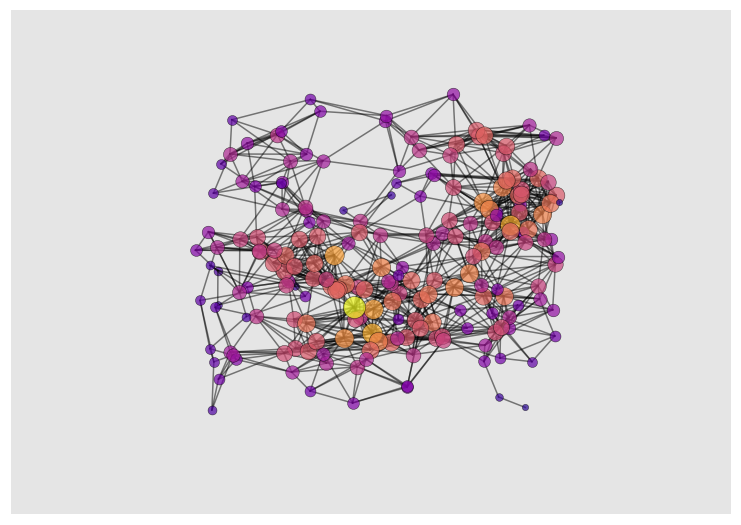

In [17]:
n=200
G = generate_random_3Dgraph(n_nodes=n, radius=0.25, seed=1)
network_plot_3D(G,0, save=False)

To Create the DataFrame for Dash.plotly app

In [2]:
data = ['cpt', 'density'] #pull raw data from cpt.csv and density.csv
T = [298.1, 298.16] #select narrow state variable ranges
P = [101, 102] #we will set MD simulation to 101 kPa and 298 K
data = salty.aggregate_data(data,T=T,P=P)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
import pandas as pd
from numpy.linalg import norm
merged = salty.merge_duplicates(data)
to_hull = merged.iloc[:,2:4]
hull = ConvexHull(to_hull)
%matplotlib inline
df = data.Data
vizapp = salty.assign_category(merged)

Identified 82 unique salts in 1622 datapoints
ILs labeled as other: 0
[]


In [4]:
vizapp.to_csv("visualize/assets/vizapp.csv", index=False)